# Model: Random Forest

### Import packages and modules

In [1]:
import csv
import numpy as np
import pandas as pd
import math

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier

### Import data

In [2]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/APassan_Portfolio/Classification_CreditCardFraud/scripts/model_prep.py

### Confirm X and Y Shapes

In [3]:
# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


### Baseline Model

In [6]:
# Baseline Model 
rf_baseline = RandomForestClassifier(random_state=1)

rf_baseline.fit(X_train, Y_train)

Y_pred_rf_baseline = rf_baseline.predict(X_test)

Text(33.0, 0.5, 'Truth')

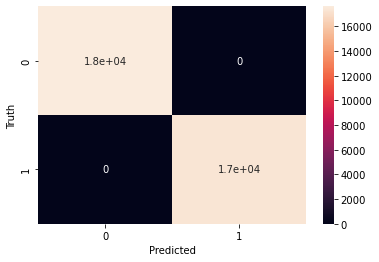

In [7]:
cm_baseline = confusion_matrix(Y_test, Y_pred_rf_baseline)

sns.heatmap(cm_baseline, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [8]:
print(classification_report(Y_test, Y_pred_rf_baseline))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17623
         1.0       1.00      1.00      1.00     17339

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



### Improve the Model

Now let us run the grid search and cross validation to improve our INSERT model.

Specifically we will try to tune our regularization parameter *max_depth* and *ntrees*.

NEED TO GENERALIZE MORE

In [4]:
# Find the best parameters
param_grid = {'n_estimators': [10, 20, 30]}

rf_gscv = GridSearchCV(RandomForestClassifier(random_state = 1, criterion = 'entropy', max_depth = 4),
                       param_grid=param_grid, 
                       cv = 5,
                       refit = True,
                       verbose = 2)

rf_gscv.fit(X_train, Y_train)

print(rf_gscv.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=20; total time=   0.8s
[CV] END ....................................n_estimators=20; total time=   0.8s
[CV] END ....................................n_estimators=20; total time=   0.8s
[CV] END ....................................n_estimators=20; total time=   0.8s
[CV] END ....................................n_estimators=20; total time=   0.8s
[CV] END ....................................n_estimators=30; total time=   1.2s
[CV] END ....................................n_es

### Final Model

In [5]:
# Improved model
rf_fin = RandomForestClassifier(random_state = 1, criterion = 'entropy', max_depth = 4, n_estimators=20)

rf_fin.fit(X_train, Y_train)

Y_pred_rf_fin = rf_fin.predict(X_test)

Text(33.0, 0.5, 'Truth')

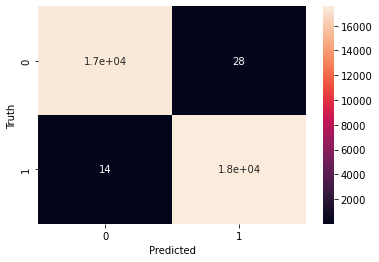

In [6]:
cm_fin = confusion_matrix(Y_test, Y_pred_rf_fin)

sns.heatmap(cm_fin, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [7]:
print(classification_report(Y_test, Y_pred_rf_fin))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17386
         1.0       1.00      1.00      1.00     17576

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962

